In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/nifty50-stock-market-data/TCS.csv
/kaggle/input/nifty50-stock-market-data/MARUTI.csv
/kaggle/input/nifty50-stock-market-data/ONGC.csv
/kaggle/input/nifty50-stock-market-data/TITAN.csv
/kaggle/input/nifty50-stock-market-data/KOTAKBANK.csv
/kaggle/input/nifty50-stock-market-data/BAJFINANCE.csv
/kaggle/input/nifty50-stock-market-data/ASIANPAINT.csv
/kaggle/input/nifty50-stock-market-data/IOC.csv
/kaggle/input/nifty50-stock-market-data/INFRATEL.csv
/kaggle/input/nifty50-stock-market-data/TATASTEEL.csv
/kaggle/input/nifty50-stock-market-data/TATAMOTORS.csv
/kaggle/input/nifty50-stock-market-data/BHARTIARTL.csv
/kaggle/input/nifty50-stock-market-data/BPCL.csv
/kaggle/input/nifty50-stock-market-data/HDFCBANK.csv
/kaggle/input/nifty50-stock-market-data/BRITANNIA.csv
/kaggle/input/nifty50-stock-market-data/POWERGRID.csv
/kaggle/input/nifty50-stock-market-data/WIPRO.csv
/kaggle/input/nifty50-stock-market-data/DRREDDY.csv
/kaggle/input/nifty50-stock-market-data/ITC.csv
/kaggle/input

In [2]:
df = pd.read_csv("/kaggle/input/nifty50-stock-market-data/NESTLEIND.csv")
#df.set_index("Date", drop=False, inplace=True)
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2010-01-08,NESTLEIND,EQ,2512.95,2555.00,2575.0,2475.20,2476.0,2494.65,2529.81,648,1.639316e+11,NaN,438,0.6759
1,2010-01-11,NESTLEIND,EQ,2494.65,2401.00,2515.0,2400.00,2500.0,2498.95,2494.44,825,2.057909e+11,NaN,638,0.7733
2,2010-01-12,NESTLEIND,EQ,2498.95,2540.00,2540.0,2471.35,2505.0,2502.85,2485.22,68346,1.698549e+13,NaN,67695,0.9905
3,2010-01-13,NESTLEIND,EQ,2502.85,2502.85,2540.0,2480.00,2489.8,2489.35,2491.94,1032,2.571682e+11,NaN,718,0.6957
4,2010-01-14,NESTLEIND,EQ,2489.35,2535.00,2595.0,2470.00,2560.0,2568.20,2510.27,330361,8.292956e+13,NaN,329193,0.9965


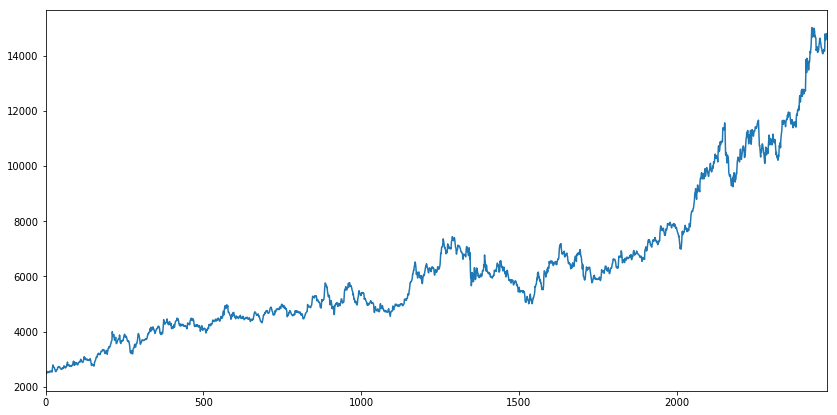

In [3]:
df.VWAP.plot(figsize=(14, 7))

In [4]:
#install the 
!pip install pmdarima

     |████████████████████████████████| 1.5MB 4.9MB/s 


In [5]:
import numpy as np
import pandas as pd

from fbprophet import Prophet
from matplotlib import pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error

myfavouritenumber = 13
seed = myfavouritenumber
np.random.seed(seed)

In [6]:
df=df[['Date','VWAP']]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2477 entries, 0 to 2476
Data columns (total 2 columns):
Date    2477 non-null object
VWAP    2477 non-null float64
dtypes: float64(1), object(1)
memory usage: 38.8+ KB


In [8]:
df.columns=['ds','y']

In [9]:
df_train = df[df.ds < "2019"]
df_valid = df[df.ds >= "2019"]

In [10]:
df_valid.head()

,ds,y
2232,2019-01-01,11053.29
2233,2019-01-02,11042.49
2234,2019-01-03,11291.19
2235,2019-01-04,10947.17
2236,2019-01-07,10789.27


In [11]:
df_valid.tail()

,ds,y
2472,2019-12-24,14563.05
2473,2019-12-26,14616.61
2474,2019-12-27,14644.08
2475,2019-12-30,14797.24
2476,2019-12-31,14786.90


In [12]:
#Declare the model
model = auto_arima(df_train.y,  trace=True, error_action="ignore", suppress_warnings=True)

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=25694.496, BIC=25728.757, Fit time=2.762 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=25733.707, BIC=25745.128, Fit time=0.106 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=25692.225, BIC=25709.356, Fit time=0.125 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=25692.669, BIC=25709.800, Fit time=0.141 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=25737.255, BIC=25742.965, Fit time=0.036 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=25694.175, BIC=25717.016, Fit time=0.144 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=25694.182, BIC=25717.023, Fit time=0.143 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=25696.176, BIC=25724.727, Fit time=0.772 seconds
Total fit time: 4.247 seconds


In [13]:
#Fit the model
model.fit(df_train.y)

ARIMA(maxiter=50, method='lbfgs', order=(1, 1, 0), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 1),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [14]:
forecast = model.predict(n_periods=len(df_valid))
df_valid["Forecast_ARIMA"] = forecast

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



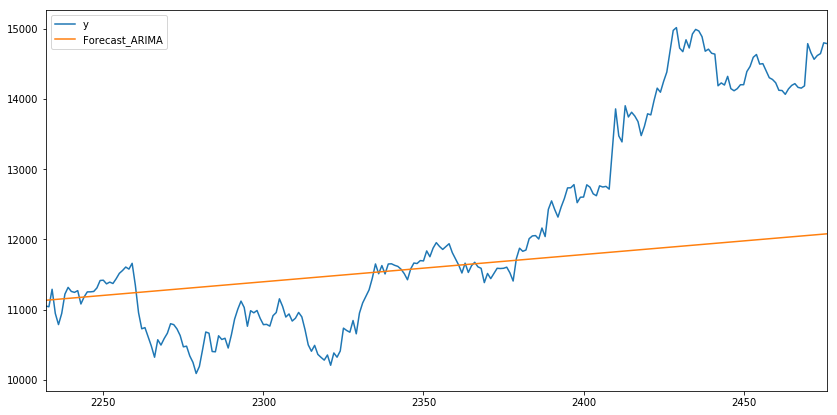

In [15]:
df_valid[["y", "Forecast_ARIMA"]].plot(figsize=(14, 7))

In [16]:
from pmdarima.arima import ndiffs
adf_diffs = ndiffs(df_valid.y, alpha=0.05, test='adf', max_d=3)

In [17]:
adf_diffs

1

In [18]:
m=Prophet()

In [19]:
m.fit(df_train)

In [20]:

forecast = m.predict(df_valid)

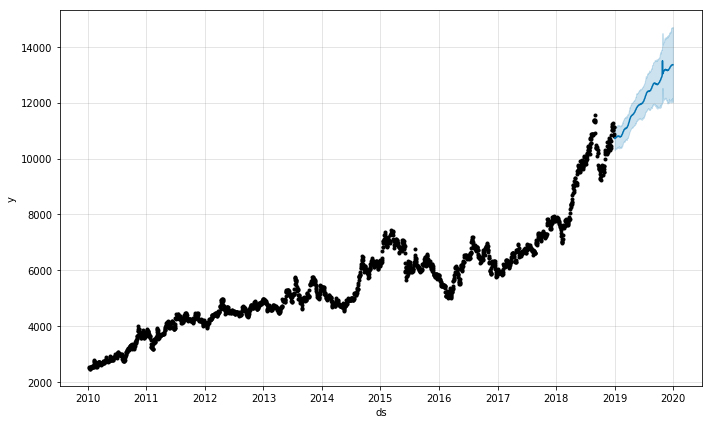

In [21]:
fig1 = m.plot(forecast)

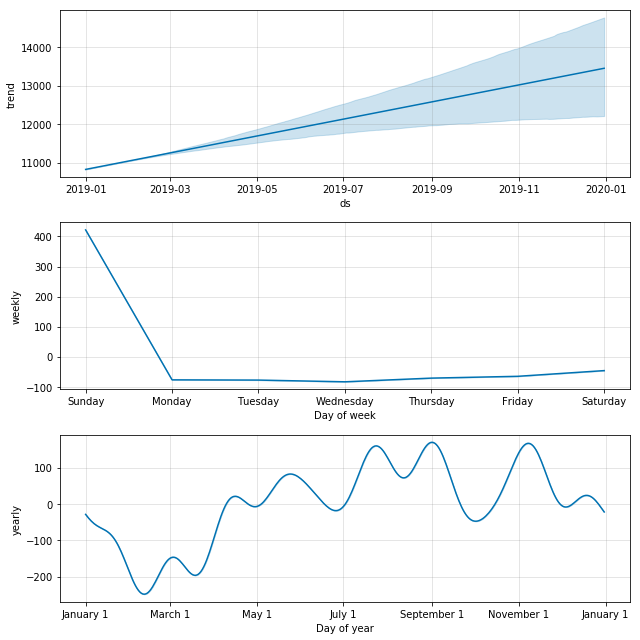

In [22]:

fig2 = m.plot_components(forecast)

In [23]:
df_valid["Forecast_Prophet"] = forecast.yhat.values

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



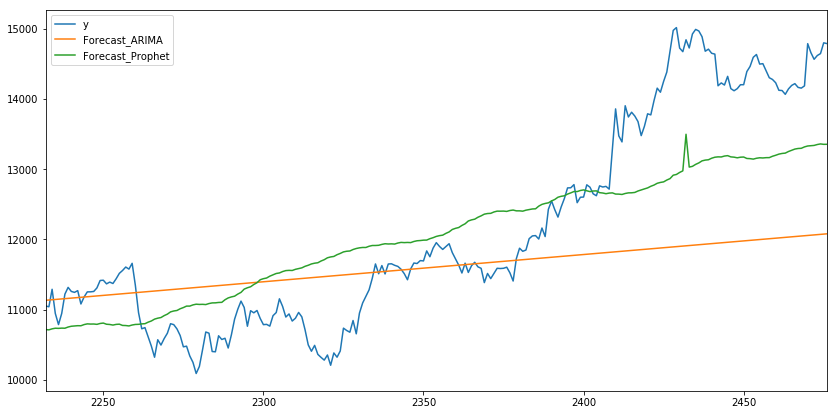

In [24]:
df_valid[["y", "Forecast_ARIMA", "Forecast_Prophet"]].plot(figsize=(14, 7))

In [25]:
print("\nMAE of Auto ARIMA:", mean_absolute_error(df_valid.y, df_valid.Forecast_ARIMA))


MAE of Auto ARIMA: 985.8280296180365


In [26]:
print("MAE of Prophet:", mean_absolute_error(df_valid.y, df_valid.Forecast_Prophet))

MAE of Prophet: 726.4763331905378
